# Table of Contents
 <p><div class="lev1"><a href="#VAE+GAN"><span class="toc-item-num">1&nbsp;&nbsp;</span>VAE+GAN</a></div>

# VAE+GAN

In [1]:
%matplotlib inline
import sys, os
import numpy as np
import pandas as pd
import six
import math

from PIL import Image
from StringIO import StringIO
import matplotlib.pyplot as plt

import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.functions.loss.vae import gaussian_kl_divergence


In [2]:
from vaegan import Encoder, Decoder, Discriminator, EncDec
from fauxtograph import VAEGAN, get_paths, image_resize

In [4]:
paths = get_paths('/home/tokita/projects/cinet/YouTubePriors_flv4/DividedImages/images_resize/sample_train')
print len(paths)

1000


In [5]:
vg = VAEGAN(img_width=96, img_height=96, flag_gpu=True)

In [6]:
# 画像ファイルのロード、正規化、transpose
x_all = vg.load_images(paths)
print 'image_data_shape = {}'.format(x_all.shape)

100%|██████████| 1000/1000 [00:08<00:00, 113.68it/s]

Image Files Loaded!
image_data_shape = (1000, 3, 96, 96)


In [7]:
m_path = './out/model/'
im_path = './out/images/'

In [8]:
vg.fit(x_all, save_freq=100, pic_freq=50, n_epochs=50, model_path = m_path, img_path=im_path, mirroring=True)

  0%|          | 0/20 [00:00<?, ?it/s]

epoch: 1


  5%|▌         | 1/20 [00:00<00:02,  8.95it/s]

enc_loss = 2.0388815403, dec_loss = 0.985114097595 , disc_loss = 0.651178658009
gan_loss = 0.651178658009, sim_loss = 1.636292696, kl_loss = 0.402588665485
time: 8.109830


epoch: 2


  5%|▌         | 1/20 [00:00<00:02,  8.90it/s]

enc_loss = 1.65330386162, dec_loss = 0.824710190296 , disc_loss = 0.615652740002
gan_loss = 0.615652740002, sim_loss = 1.44036281109, kl_loss = 0.212941020727
time: 6.212859


epoch: 3


  5%|▌         | 1/20 [00:00<00:02,  8.87it/s]

enc_loss = 1.50489604473, dec_loss = 0.872235953808 , disc_loss = 0.488908827305
gan_loss = 0.488908827305, sim_loss = 1.36114478111, kl_loss = 0.14375115931
time: 6.230410


epoch: 4


  5%|▌         | 1/20 [00:00<00:02,  7.15it/s]

enc_loss = 1.40653860569, dec_loss = 0.761862874031 , disc_loss = 0.505030274391
gan_loss = 0.505030274391, sim_loss = 1.26689314842, kl_loss = 0.139645457268
time: 6.237158


epoch: 5


  5%|▌         | 1/20 [00:00<00:02,  8.78it/s]

enc_loss = 1.22584366798, dec_loss = 0.734722733498 , disc_loss = 0.368894696236
gan_loss = 0.368894696236, sim_loss = 1.10361742973, kl_loss = 0.12222649157
time: 6.264058


epoch: 6


  5%|▌         | 1/20 [00:00<00:02,  8.78it/s]

enc_loss = 1.1166741848, dec_loss = 0.616539001465 , disc_loss = 0.374689370394
gan_loss = 0.374689370394, sim_loss = 0.991228282452, kl_loss = 0.125445827842
time: 6.240846


epoch: 7


  5%|▌         | 1/20 [00:00<00:02,  8.86it/s]

enc_loss = 1.0600605011, dec_loss = 0.348822891712 , disc_loss = 0.595279216766
gan_loss = 0.595279216766, sim_loss = 0.944102168083, kl_loss = 0.115958318114
time: 6.268558


epoch: 8


  5%|▌         | 1/20 [00:00<00:02,  8.76it/s]

enc_loss = 0.977050125599, dec_loss = 0.0970826372504 , disc_loss = 0.761244893074
gan_loss = 0.761244893074, sim_loss = 0.858327686787, kl_loss = 0.118722595274
time: 6.292541


epoch: 9


  5%|▌         | 1/20 [00:00<00:02,  8.84it/s]

enc_loss = 0.92797344923, dec_loss = 0.18417802453 , disc_loss = 0.631002128124
gan_loss = 0.631002128124, sim_loss = 0.815180182457, kl_loss = 0.112793281674
time: 6.318010


epoch: 10


  5%|▌         | 1/20 [00:00<00:02,  8.76it/s]

enc_loss = 0.96429669857, dec_loss = 0.184242904186 , disc_loss = 0.668587207794
gan_loss = 0.668587207794, sim_loss = 0.852830052376, kl_loss = 0.111466571689
time: 6.295206


epoch: 11


  5%|▌         | 1/20 [00:00<00:02,  8.85it/s]

enc_loss = 0.947761178017, dec_loss = 0.378307253122 , disc_loss = 0.466782987118
gan_loss = 0.466782987118, sim_loss = 0.845090270042, kl_loss = 0.102670893073
time: 6.326709


epoch: 12


  5%|▌         | 1/20 [00:00<00:02,  7.93it/s]

enc_loss = 1.00285327435, dec_loss = 0.587134718895 , disc_loss = 0.316535770893
gan_loss = 0.316535770893, sim_loss = 0.903670489788, kl_loss = 0.0991828665137
time: 6.734465


epoch: 13


  5%|▌         | 1/20 [00:00<00:02,  7.96it/s]

enc_loss = 1.04165780544, dec_loss = 0.813235580921 , disc_loss = 0.12697173655
gan_loss = 0.12697173655, sim_loss = 0.94020730257, kl_loss = 0.101450540125
time: 7.067372


epoch: 14


  5%|▌         | 1/20 [00:00<00:02,  7.98it/s]

enc_loss = 1.00450861454, dec_loss = 0.803194046021 , disc_loss = 0.111825741827
gan_loss = 0.111825741827, sim_loss = 0.91501969099, kl_loss = 0.0894888341427
time: 7.043369


epoch: 15


  5%|▌         | 1/20 [00:00<00:02,  8.01it/s]

enc_loss = 1.06567287445, dec_loss = 0.732547879219 , disc_loss = 0.231582552195
gan_loss = 0.231582552195, sim_loss = 0.964130282402, kl_loss = 0.101542457938
time: 7.047435


epoch: 16


  5%|▌         | 1/20 [00:00<00:02,  8.02it/s]

enc_loss = 1.07270228863, dec_loss = 0.444131463766 , disc_loss = 0.520195543766
gan_loss = 0.520195543766, sim_loss = 0.964326858521, kl_loss = 0.108375385404
time: 6.935187


epoch: 17


  5%|▌         | 1/20 [00:00<00:02,  8.14it/s]

enc_loss = 1.00145161152, dec_loss = 0.544289648533 , disc_loss = 0.354262977839
gan_loss = 0.354262977839, sim_loss = 0.898552536964, kl_loss = 0.102899000049
time: 6.861561


epoch: 18


  5%|▌         | 1/20 [00:00<00:02,  8.14it/s]

enc_loss = 1.02800559998, dec_loss = 0.800154566765 , disc_loss = 0.140604332089
gan_loss = 0.140604332089, sim_loss = 0.940759062767, kl_loss = 0.0872466117144
time: 6.878832


epoch: 19


  5%|▌         | 1/20 [00:00<00:02,  8.18it/s]

enc_loss = 1.00895285606, dec_loss = 0.780317604542 , disc_loss = 0.140390247107
gan_loss = 0.140390247107, sim_loss = 0.920707821846, kl_loss = 0.0882448926568
time: 6.859211


epoch: 20


  5%|▌         | 1/20 [00:00<00:02,  8.05it/s]

enc_loss = 1.00326895714, dec_loss = 0.760829687119 , disc_loss = 0.157059907913
gan_loss = 0.157059907913, sim_loss = 0.917889595032, kl_loss = 0.085379332304
time: 6.937835


epoch: 21


  5%|▌         | 1/20 [00:00<00:02,  8.00it/s]

enc_loss = 1.03775763512, dec_loss = 0.625753521919 , disc_loss = 0.320829898119
gan_loss = 0.320829898119, sim_loss = 0.946583390236, kl_loss = 0.0911742523313
time: 6.966059


epoch: 22


  5%|▌         | 1/20 [00:00<00:02,  7.93it/s]

enc_loss = 1.15655112267, dec_loss = 0.680969655514 , disc_loss = 0.386067599058
gan_loss = 0.386067599058, sim_loss = 1.06703722477, kl_loss = 0.0895139425993
time: 7.062166


epoch: 23


  5%|▌         | 1/20 [00:00<00:02,  7.93it/s]

enc_loss = 1.18410146236, dec_loss = 1.03054261208 , disc_loss = 0.0639516189694
gan_loss = 0.0639516189694, sim_loss = 1.09449410439, kl_loss = 0.08960737288
time: 7.047261


epoch: 24


  5%|▌         | 1/20 [00:00<00:02,  7.88it/s]

enc_loss = 1.07944881916, dec_loss = 0.804020047188 , disc_loss = 0.187050938606
gan_loss = 0.187050938606, sim_loss = 0.991070926189, kl_loss = 0.0883777961135
time: 7.071635


epoch: 25


  5%|▌         | 1/20 [00:00<00:02,  7.92it/s]

enc_loss = 1.03561377525, dec_loss = 0.846073806286 , disc_loss = 0.116423174739
gan_loss = 0.116423174739, sim_loss = 0.962496936321, kl_loss = 0.0731168687344
time: 7.050999


epoch: 26


  5%|▌         | 1/20 [00:00<00:02,  7.92it/s]

enc_loss = 0.96664750576, dec_loss = 0.841760277748 , disc_loss = 0.0495765805244
gan_loss = 0.0495765805244, sim_loss = 0.891337037086, kl_loss = 0.0753105580807
time: 7.066023


epoch: 27


  5%|▌         | 1/20 [00:00<00:02,  7.87it/s]

enc_loss = 1.00333893299, dec_loss = 0.630005776882 , disc_loss = 0.291159331799
gan_loss = 0.291159331799, sim_loss = 0.921165108681, kl_loss = 0.0821738988161
time: 7.073642


epoch: 28


  5%|▌         | 1/20 [00:00<00:02,  7.89it/s]

enc_loss = 0.998101711273, dec_loss = 0.485849946737 , disc_loss = 0.410324245691
gan_loss = 0.410324245691, sim_loss = 0.896174252033, kl_loss = 0.101927541196
time: 7.043952


epoch: 29


  5%|▌         | 1/20 [00:00<00:02,  7.87it/s]

enc_loss = 0.975786864758, dec_loss = 0.490410655737 , disc_loss = 0.396214485168
gan_loss = 0.396214485168, sim_loss = 0.886625170708, kl_loss = 0.0891615226865
time: 7.069835


epoch: 30


  5%|▌         | 1/20 [00:00<00:02,  7.94it/s]

enc_loss = 0.987347006798, dec_loss = 0.75157302618 , disc_loss = 0.155371755362
gan_loss = 0.155371755362, sim_loss = 0.906944870949, kl_loss = 0.0804021283984
time: 7.048906


epoch: 31


  5%|▌         | 1/20 [00:00<00:02,  7.90it/s]

enc_loss = 0.941513180733, dec_loss = 0.453203976154 , disc_loss = 0.416612148285
gan_loss = 0.416612148285, sim_loss = 0.86981600523, kl_loss = 0.0716971307993
time: 7.067874


epoch: 32


  5%|▌         | 1/20 [00:00<00:02,  7.86it/s]

enc_loss = 0.947972893715, dec_loss = 0.234512418509 , disc_loss = 0.629531502724
gan_loss = 0.629531502724, sim_loss = 0.864044010639, kl_loss = 0.0839287787676
time: 7.049195


epoch: 33


  5%|▌         | 1/20 [00:00<00:02,  7.85it/s]

enc_loss = 0.952221691608, dec_loss = 0.294971644878 , disc_loss = 0.566421985626
gan_loss = 0.566421985626, sim_loss = 0.861393630505, kl_loss = 0.0908280983567
time: 7.069074


epoch: 34


  5%|▌         | 1/20 [00:00<00:02,  7.92it/s]

enc_loss = 0.945316910744, dec_loss = 0.430020749569 , disc_loss = 0.417405545712
gan_loss = 0.417405545712, sim_loss = 0.84742629528, kl_loss = 0.0978905111551
time: 7.049168


epoch: 35


  5%|▌         | 1/20 [00:00<00:02,  7.93it/s]

enc_loss = 0.970323860645, dec_loss = 0.637387812138 , disc_loss = 0.246471405029
gan_loss = 0.246471405029, sim_loss = 0.883859157562, kl_loss = 0.0864646732807
time: 7.071362


epoch: 36


  5%|▌         | 1/20 [00:00<00:02,  7.91it/s]

enc_loss = 0.99276715517, dec_loss = 0.679137945175 , disc_loss = 0.22654440999
gan_loss = 0.22654440999, sim_loss = 0.905682265759, kl_loss = 0.0870848894119
time: 7.044130


epoch: 37


  5%|▌         | 1/20 [00:00<00:02,  7.94it/s]

enc_loss = 1.03906774521, dec_loss = 0.613184809685 , disc_loss = 0.335567057133
gan_loss = 0.335567057133, sim_loss = 0.948751747608, kl_loss = 0.090316042304
time: 7.066743


epoch: 38


  5%|▌         | 1/20 [00:00<00:02,  7.92it/s]

enc_loss = 1.04120457172, dec_loss = 0.79534214735 , disc_loss = 0.161974340677
gan_loss = 0.161974340677, sim_loss = 0.95731651783, kl_loss = 0.0838879793882
time: 7.045596


epoch: 39


  5%|▌         | 1/20 [00:00<00:02,  7.98it/s]

enc_loss = 1.11509132385, dec_loss = 0.574019610882 , disc_loss = 0.445884168148
gan_loss = 0.445884168148, sim_loss = 1.01990389824, kl_loss = 0.0951877310872
time: 7.075042


epoch: 40


  5%|▌         | 1/20 [00:00<00:02,  7.88it/s]

enc_loss = 1.00361251831, dec_loss = 0.587246954441 , disc_loss = 0.331333756447
gan_loss = 0.331333756447, sim_loss = 0.918580830097, kl_loss = 0.0850316882133
time: 7.088251


epoch: 41


  5%|▌         | 1/20 [00:00<00:02,  7.95it/s]

enc_loss = 1.05554080009, dec_loss = 0.401483595371 , disc_loss = 0.570822060108
gan_loss = 0.570822060108, sim_loss = 0.972305595875, kl_loss = 0.083235219121
time: 7.048737


epoch: 42


  5%|▌         | 1/20 [00:00<00:02,  7.89it/s]

enc_loss = 1.01410508156, dec_loss = 0.394531816244 , disc_loss = 0.529736876488
gan_loss = 0.529736876488, sim_loss = 0.924268603325, kl_loss = 0.0898365974426
time: 7.071429


epoch: 43


  5%|▌         | 1/20 [00:00<00:02,  7.96it/s]

enc_loss = 1.01708102226, dec_loss = 0.496248543262 , disc_loss = 0.433888912201
gan_loss = 0.433888912201, sim_loss = 0.930137515068, kl_loss = 0.0869433805346
time: 7.050858


epoch: 44


  5%|▌         | 1/20 [00:00<00:02,  7.98it/s]

enc_loss = 1.01882016659, dec_loss = 0.895611405373 , disc_loss = 0.0486602149904
gan_loss = 0.0486602149904, sim_loss = 0.944271683693, kl_loss = 0.0745486021042
time: 7.067774


epoch: 45


  5%|▌         | 1/20 [00:00<00:02,  7.89it/s]

enc_loss = 0.969163894653, dec_loss = 0.873942255974 , disc_loss = 0.0238280128688
gan_loss = 0.0238280128688, sim_loss = 0.897770226002, kl_loss = 0.0713935866952
time: 7.050769


epoch: 46


  5%|▌         | 1/20 [00:00<00:02,  7.90it/s]

enc_loss = 0.951078236103, dec_loss = 0.752210497856 , disc_loss = 0.126198038459
gan_loss = 0.126198038459, sim_loss = 0.878408610821, kl_loss = 0.0726695656776
time: 7.070331


epoch: 47


  5%|▌         | 1/20 [00:00<00:02,  7.91it/s]

enc_loss = 0.994208931923, dec_loss = 0.573607087135 , disc_loss = 0.342735052109
gan_loss = 0.342735052109, sim_loss = 0.916342079639, kl_loss = 0.0778668373823
time: 7.044185


epoch: 48


  5%|▌         | 1/20 [00:00<00:02,  7.88it/s]

enc_loss = 1.03547084332, dec_loss = 0.5489538908 , disc_loss = 0.404780298471
gan_loss = 0.404780298471, sim_loss = 0.953734219074, kl_loss = 0.0817367509007
time: 7.104383


epoch: 49


  5%|▌         | 1/20 [00:00<00:02,  7.94it/s]

enc_loss = 1.07524812222, dec_loss = 0.0710692927241 , disc_loss = 0.904330551624
gan_loss = 0.904330551624, sim_loss = 0.975399792194, kl_loss = 0.0998483598232
time: 7.048911


epoch: 50


100%|██████████| 20/20 [00:06<00:00,  2.81it/s]


enc_loss = 1.07240271568, dec_loss = 0.258855074644 , disc_loss = 0.717792391777
gan_loss = 0.717792391777, sim_loss = 0.976647496223, kl_loss = 0.095755212009
time: 7.077343




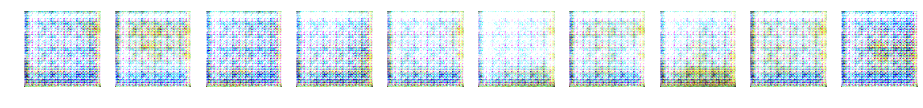

In [9]:
shape = 10, vg.latent_width
random_data = np.random.standard_normal(shape).astype('f')*3.
images = vg.inverse_transform(random_data, test=True)
plt.figure(figsize=(16,3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()
